In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:

# Building a basic neural network
class BasicNN(nn.Module):
    # initializing the constructor for our class BasicNN
    def __init__(self):
        #calling the constructor of parent class (Module)
        super().__init__()
        # Attributes of weight and biases for the nn
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)

    def forward(self, input):
        inp_to_top_relu = input * self.w00 + self.b00
        top_relu_out = F.relu(inp_to_top_relu)
        scaled_top_relu_out = top_relu_out * self.w01

        inp_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_out = F.relu(inp_to_bottom_relu)
        scaled_bottom_relu_out = bottom_relu_out * self.w11

        inp_to_final_relu = scaled_top_relu_out + scaled_bottom_relu_out + self.final_bias
        output = F.relu(inp_to_final_relu)
        return output



![picture](https://drive.google.com/uc?id=1TS2LYebQcOnhdjHfvPIGAENz65-qKu6S)


Text(0, 0.5, 'efficacy')

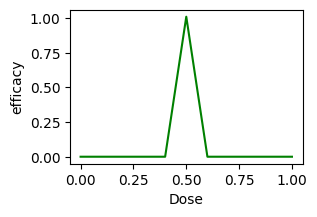

In [5]:
input_doses = torch.linspace(start=0, end=1, steps=11)
input_doses
model = BasicNN()
output_values = model(input_doses)
output_values
plt.figure(figsize=(3,2))
sns.lineplot(x=input_doses, y=output_values, color='green')
plt.xlabel('Dose')
plt.ylabel('efficacy')

In [6]:
# Training Data
inputs = torch.tensor([0.0, 0.5, 1.])
labels = torch.tensor([0.0, 1.0, 0.0])

class BasicNNTrain(nn.Module):
    def __init__(self):
        super().__init__()
        # Attributes of weight and biases for the nn
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)

    def forward(self, input):
        inp_to_top_relu = input * self.w00 + self.b00
        top_relu_out = F.relu(inp_to_top_relu)
        scaled_top_relu_out = top_relu_out * self.w01

        inp_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_out = F.relu(inp_to_bottom_relu)
        scaled_bottom_relu_out = bottom_relu_out * self.w11

        inp_to_final_relu = scaled_top_relu_out + scaled_bottom_relu_out + self.final_bias
        output = F.relu(inp_to_final_relu)
        return output



In [7]:
model = BasicNNTrain()

# Stochastic Gradient Descent
optimizer = SGD(model.parameters(), lr=0.1)
print(f"Final bias before optimization: {model.final_bias.data.item()} \n")



Final bias before optimization: 0.0 



Text(0.5, 0, 'Dose')

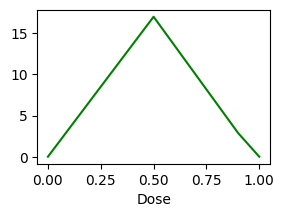

In [8]:
plt.figure(figsize=(3, 2))
output_values = model(input_doses)
sns.lineplot(x=input_doses, y=output_values.detach(), color='green')
plt.xlabel('Dose')

In [9]:
# Training Loop
for epoch in range(100):
    total_loss = 0
    for i in range(len(inputs)):
        input_i = inputs[i]
        label_i = labels[i]
        output_i = model(input_i)

        loss = (output_i - label_i) ** 2
        total_loss += float(loss)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    avg_loss = total_loss / len(inputs)
    print(f"Epoch {epoch + 1}, Average Loss: {avg_loss}")

print(f"Final bias after optimization: {model.final_bias.data.item()} \n")




Epoch 1, Average Loss: 85.44003295898438
Epoch 2, Average Loss: 54.68162536621094
Epoch 3, Average Loss: 34.996236165364586
Epoch 4, Average Loss: 22.39759063720703
Epoch 5, Average Loss: 14.334456125895182
Epoch 6, Average Loss: 9.174053192138672
Epoch 7, Average Loss: 5.8713938395182295
Epoch 8, Average Loss: 3.757692019144694
Epoch 9, Average Loss: 2.40492312113444
Epoch 10, Average Loss: 1.539150555928548
Epoch 11, Average Loss: 0.9850567976633707
Epoch 12, Average Loss: 0.6304365396499634
Epoch 13, Average Loss: 0.40347909927368164
Epoch 14, Average Loss: 0.2582268516222636
Epoch 15, Average Loss: 0.16526509324709573
Epoch 16, Average Loss: 0.1057697335879008
Epoch 17, Average Loss: 0.06769262750943501
Epoch 18, Average Loss: 0.04332337280114492
Epoch 19, Average Loss: 0.027726995448271435
Epoch 20, Average Loss: 0.017745306094487507
Epoch 21, Average Loss: 0.01135704293847084
Epoch 22, Average Loss: 0.007268507654468219
Epoch 23, Average Loss: 0.004651844811936219
Epoch 24, Avera

Text(0.5, 0, 'Dose')

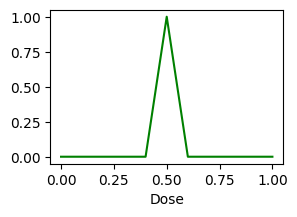

In [8]:
plt.figure(figsize=(3, 2))
output_values = model(input_doses)
sns.lineplot(x=input_doses, y=output_values.detach(), color='green')
plt.xlabel('Dose')

## Flow

                  +-----------------------------------+
                  |       Define BasicNN Class        |
                  |-----------------------------------|
                  | - w00, b00, w01, w10, b10, w11    |
                  |   (Parameters without gradients)  |
                  | - final_bias (Parameter with      |
                  |   gradients)                      |
                  |                                   |
                  | - forward(input):                 |
                  |   Define forward pass of the NN   |
                  +-----------------------------------+
                                  ^
                                  |
                                  |
                                  |
                                  v
                +---------------------------------------+
                | Define BasicNNTrain Class             |
                |---------------------------------------|
                | - w00, b00, w01, w10, b10, w11        |
                |   (Parameters without gradients)      |
                | - final_bias (Parameter with          |
                |   gradients)                          |
                |                                       |
                | - forward(input):                     |
                |   Define forward pass of the NN       |
                +---------------------------------------+
                                  ^
                                  |
                                  |
                                  |
                                  v
          +---------------------------------------------------+
          |       Training Loop with Stochastic Gradient      |
          |                 Descent (SGD)                     |
          |---------------------------------------------------|
          | - Set the learning rate (lr)                      |
          | - Iterate over epochs and data points             |
          | - Compute the output of the NN for each input     |
          | - Calculate the loss using mean squared error     |
          | - Perform backpropagation to compute gradients    |
          | - Update the parameters using the optimizer       |
          +---------------------------------------------------+
                                  ^
                                  |
                                  |
                                  |
                                  v
              +---------------------------------------------+
              |          Output: Trained Model              |
              |---------------------------------------------|
              | - BasicNNTrain model with optimized         |
              |   final_bias parameter                      |
              | - Plot showing the output of the model      |
              |   (efficacy of dose) for given input doses  |
              +---------------------------------------------+